<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Load-and-Explore-the-Data" data-toc-modified-id="Load-and-Explore-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load and Explore the Data</a></span></li><li><span><a href="#Merge-Data-and-Remove-Missing-values" data-toc-modified-id="Merge-Data-and-Remove-Missing-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merge Data and Remove Missing values</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Price-vs-Region,--Price-vs-Banner" data-toc-modified-id="Price-vs-Region,--Price-vs-Banner-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Price vs Region,  Price vs Banner</a></span></li><li><span><a href="#Price-vs-Store-ID" data-toc-modified-id="Price-vs-Store-ID-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Price vs Store ID</a></span></li><li><span><a href="#Sum-of-Prices-Per-Day-by-Region" data-toc-modified-id="Sum-of-Prices-Per-Day-by-Region-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Sum of Prices Per Day by Region</a></span></li><li><span><a href="#Sum-of-Prices-Per-Day-by-Banner" data-toc-modified-id="Sum-of-Prices-Per-Day-by-Banner-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Sum of Prices Per Day by Banner</a></span></li><li><span><a href="#Sum-of-Prices-Per-Day-by-Store-ID" data-toc-modified-id="Sum-of-Prices-Per-Day-by-Store-ID-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Sum of Prices Per Day by Store ID</a></span></li><li><span><a href="#Defined-the-Anomaly-case" data-toc-modified-id="Defined-the-Anomaly-case-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Defined the Anomaly case</a></span></li></ul></li><li><span><a href="#Generate-Pivot-Table" data-toc-modified-id="Generate-Pivot-Table-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generate Pivot Table</a></span><ul class="toc-item"><li><span><a href="#Missing-values-and-save-pivot-table" data-toc-modified-id="Missing-values-and-save-pivot-table-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Missing values and save pivot table</a></span></li></ul></li></ul></li><li><span><a href="#Base-Price-modeling" data-toc-modified-id="Base-Price-modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Base Price modeling</a></span><ul class="toc-item"><li><span><a href="#Generate-regression-models" data-toc-modified-id="Generate-regression-models-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate regression models</a></span></li><li><span><a href="#Generate-multiplicative-factor-A_j-and-B_k" data-toc-modified-id="Generate-multiplicative-factor-A_j-and-B_k-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Generate multiplicative factor A_j and B_k</a></span></li><li><span><a href="#Bar-Charts-for-Banner-and-Region-Multipliers" data-toc-modified-id="Bar-Charts-for-Banner-and-Region-Multipliers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Bar Charts for Banner and Region Multipliers</a></span></li><li><span><a href="#Calculate-the-Base-Price" data-toc-modified-id="Calculate-the-Base-Price-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate the Base Price</a></span></li></ul></li><li><span><a href="#ML-Modeling" data-toc-modified-id="ML-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML Modeling</a></span><ul class="toc-item"><li><span><a href="#Training-and-Test-data" data-toc-modified-id="Training-and-Test-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training and Test data</a></span></li><li><span><a href="#ML-Model-(LR,-DT,-RF,-GB)" data-toc-modified-id="ML-Model-(LR,-DT,-RF,-GB)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ML Model (LR, DT, RF, GB)</a></span></li><li><span><a href="#Plot-the-ROC-AUC-Curve-and-Confusion-Matrix" data-toc-modified-id="Plot-the-ROC-AUC-Curve-and-Confusion-Matrix-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot the ROC-AUC Curve and Confusion Matrix</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Deal-with-Imbalance-data-(SMOTE)" data-toc-modified-id="Deal-with-Imbalance-data-(SMOTE)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Deal with Imbalance data (SMOTE)</a></span></li></ul></li></ul></div>

# Data Preparation

understand the data structure:
* Price Data (prices.csv): Contains product prices collected by auditors at various store locations
* Store information (stores.json): Describes store attributes such as Store ID, Banner, and Region
* Auditor information (auditors.csv): Provides details about the auditors who collected the prices

## Load and Explore the Data

In [55]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Load the data
prices_df = pd.read_csv('prices.csv')
with open('stores.json') as f:
    stores_data = json.load(f)
stores_df = pd.json_normalize(stores_data)
auditors_df = pd.read_csv('auditors.csv')


In [56]:
prices_df.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,03/03/20,24.95,66999,268588472
1,234,03/12/20,49.71,66999,475245085
2,234,03/05/20,25.75,66999,126967843
3,234,03/08/20,18.81,66999,708930835
4,234,03/08/20,33.32,66999,325885139


In [57]:
stores_df.head()

,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York


In [58]:
auditors_df.head()

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


## Merge Data and Remove Missing values

In [59]:
# Merge the dataframes
merged_df = prices_df.merge(stores_df, on='Store ID', how='left')
final_df = merged_df.merge(auditors_df, on='Auditor ID', how='left')
final_df = final_df.drop(columns=['Region_y'])
final_df = final_df.rename(columns={'Region_x': 'Region'})

In [60]:
final_df.head()

,Auditor ID,Date,Price,Store ID,UPC,Banner,Region,First,Last
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue,Smith
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue,Smith
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue,Smith
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue,Smith
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue,Smith


* Combine First and Last into Auditor Name

In [61]:
# Merge the 'First' and 'Last' columns into a single 'Auditor Name' column
final_df['Auditor Name'] = final_df.apply(lambda row: f"{row['First']} {row['Last']}", axis=1)

# Drop the original 'First' and 'Last' columns
final_df = final_df.drop(columns=['First', 'Last'])

In [62]:
final_df.head()

,Auditor ID,Date,Price,Store ID,UPC,Banner,Region,Auditor Name
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue Smith
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue Smith
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue Smith
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue Smith
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue Smith


In [63]:
# Remove rows with missing Banner or Region values
final_df = final_df.dropna(subset=['Banner', 'Region'])

# Calculate base prices (median price for each UPC)
base_prices = final_df.groupby('UPC')['Price'].median().reset_index()
base_prices.rename(columns={'Price': 'Base_Price'}, inplace=True)

# Merge base prices back into the original dataframe
final_df = final_df.merge(base_prices, on='UPC', how='left')

# Log-transform prices
final_df['log_price'] = np.log(final_df['Price'])

In [64]:
final_df.head()

,Auditor ID,Date,Price,Store ID,UPC,Banner,Region,Auditor Name,Base_Price,log_price
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue Smith,23.59,3.216874
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue Smith,46.29,3.906206
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue Smith,24.29,3.248435
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue Smith,17.69,2.934389
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue Smith,31.79,3.506158


## Data Visualization 

### Price vs Region,  Price vs Banner

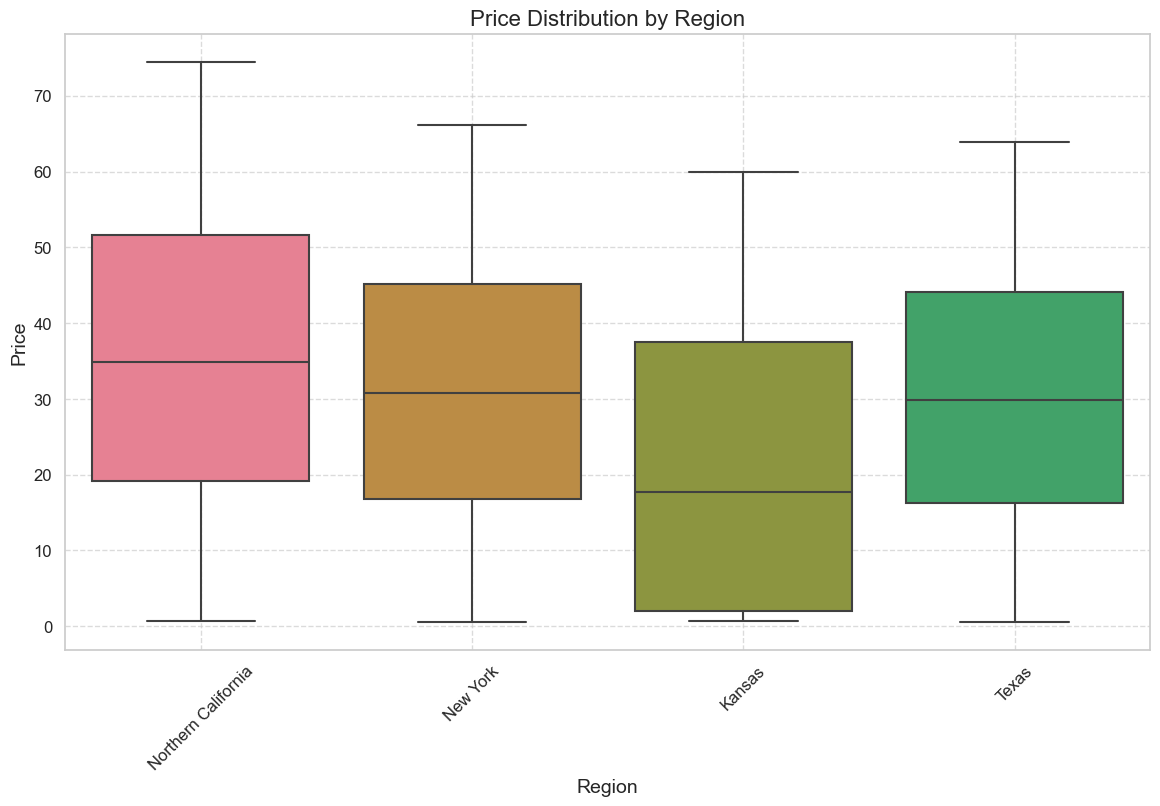

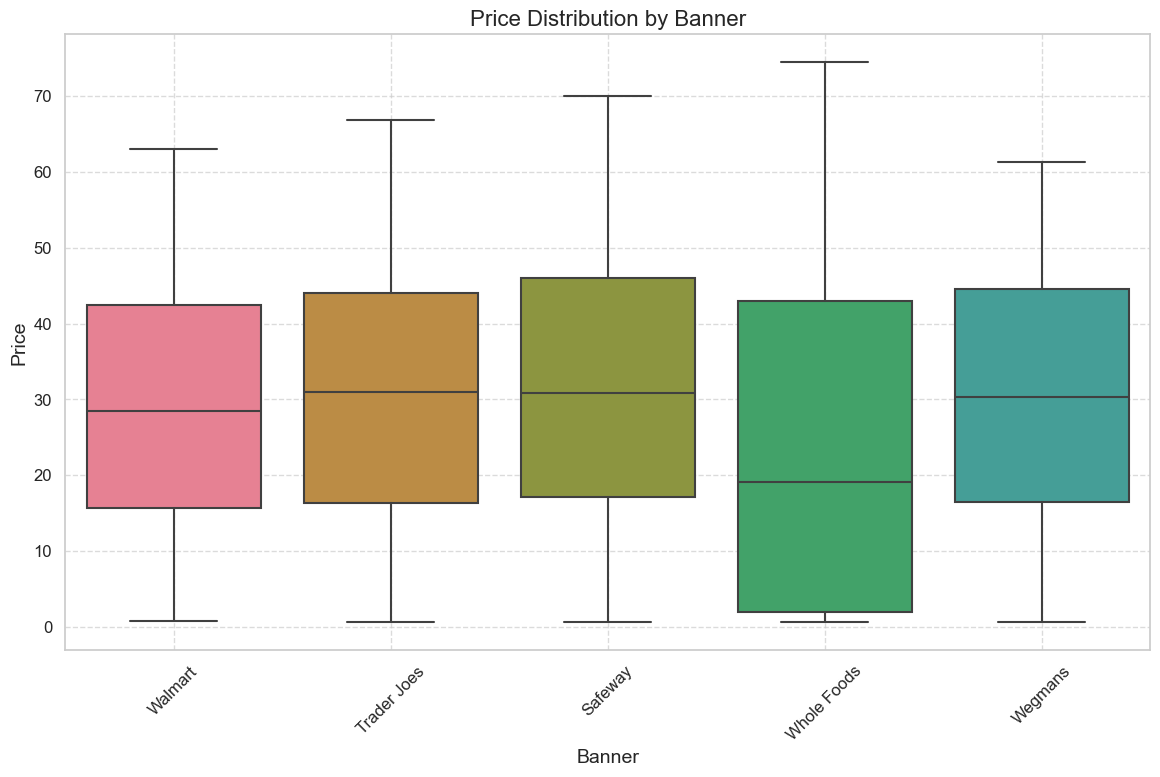

In [65]:
# Set the style and color palette for the plots
sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", 8)

# Generate a boxplot to show price distribution by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Price', data=final_df, palette=color_palette)
plt.title('Price Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Generate a boxplot to show price distribution by banner
plt.figure(figsize=(14, 8))
sns.boxplot(x='Banner', y='Price', data=final_df, palette=color_palette)
plt.title('Price Distribution by Banner', fontsize=16)
plt.xlabel('Banner', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


* Price Distribotion by Region :
It is clear from the boxplot that the median prices in Northern California and New York are pretty similar , while the median prices of Kansas are the lowest. However, Texas got the widest range of boxes which indicates differrent pricing policy meat in the region.

* Boxplot showing the Price Distribution According to Banner:
The boxplot shows that Safeway, Trader Joe's have higher median prices than Walmart, Wegmans, and Whole Foods.
Whole Foods has larger range in prices, which might be due to more type of product and pricing strategy.

### Price vs Store ID

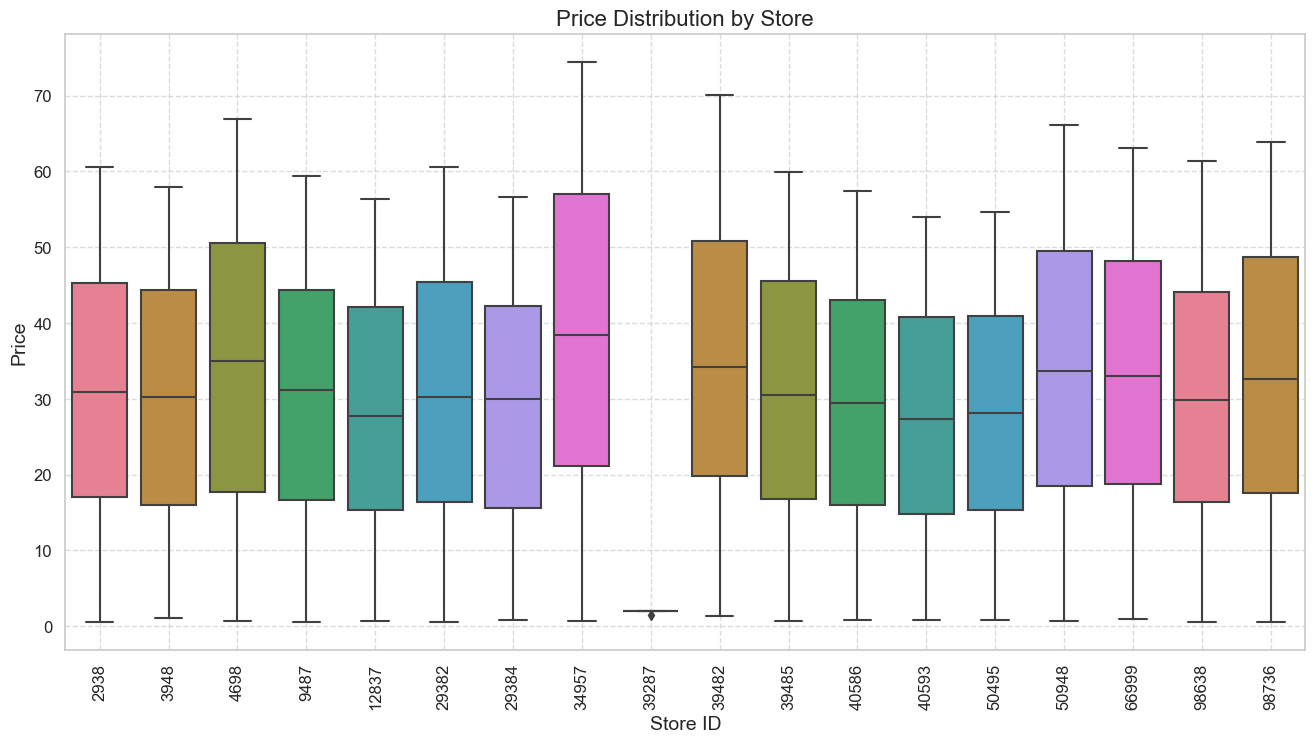

In [66]:
# Set the style and color palette for the plots
sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", 8)

# Generate a box plot to show price distribution by store
plt.figure(figsize=(16, 8))
sns.boxplot(x='Store ID', y='Price', data=final_df, palette=color_palette)
plt.title('Price Distribution by Store', fontsize=16)
plt.xlabel('Store ID', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


* Variation in Prices across the Stores:
Taking a glance at the box plot we can see that there is a significant variation in prices across the different stores. Moreover, some of the stores are more widely ranged than the other stores in terms of prices. For instance, the store 34957 stands out that there is a wide interval, where the highest and the lowest prices appear to be the lowest when compared to the other stores.This could be due to different pricing strategies between the stores, or the kind of products being sold is different.

* Median Prices: The medians (the line in the box) are different among the stores; some medians are higher and some medians are lower. This means that some stores may price their products generally higher than others, or generally lower that others, depending on factors such as store location, the kind of people who would be interested in buying at the store, what the store sells, and more.

### Sum of Prices Per Day by Region

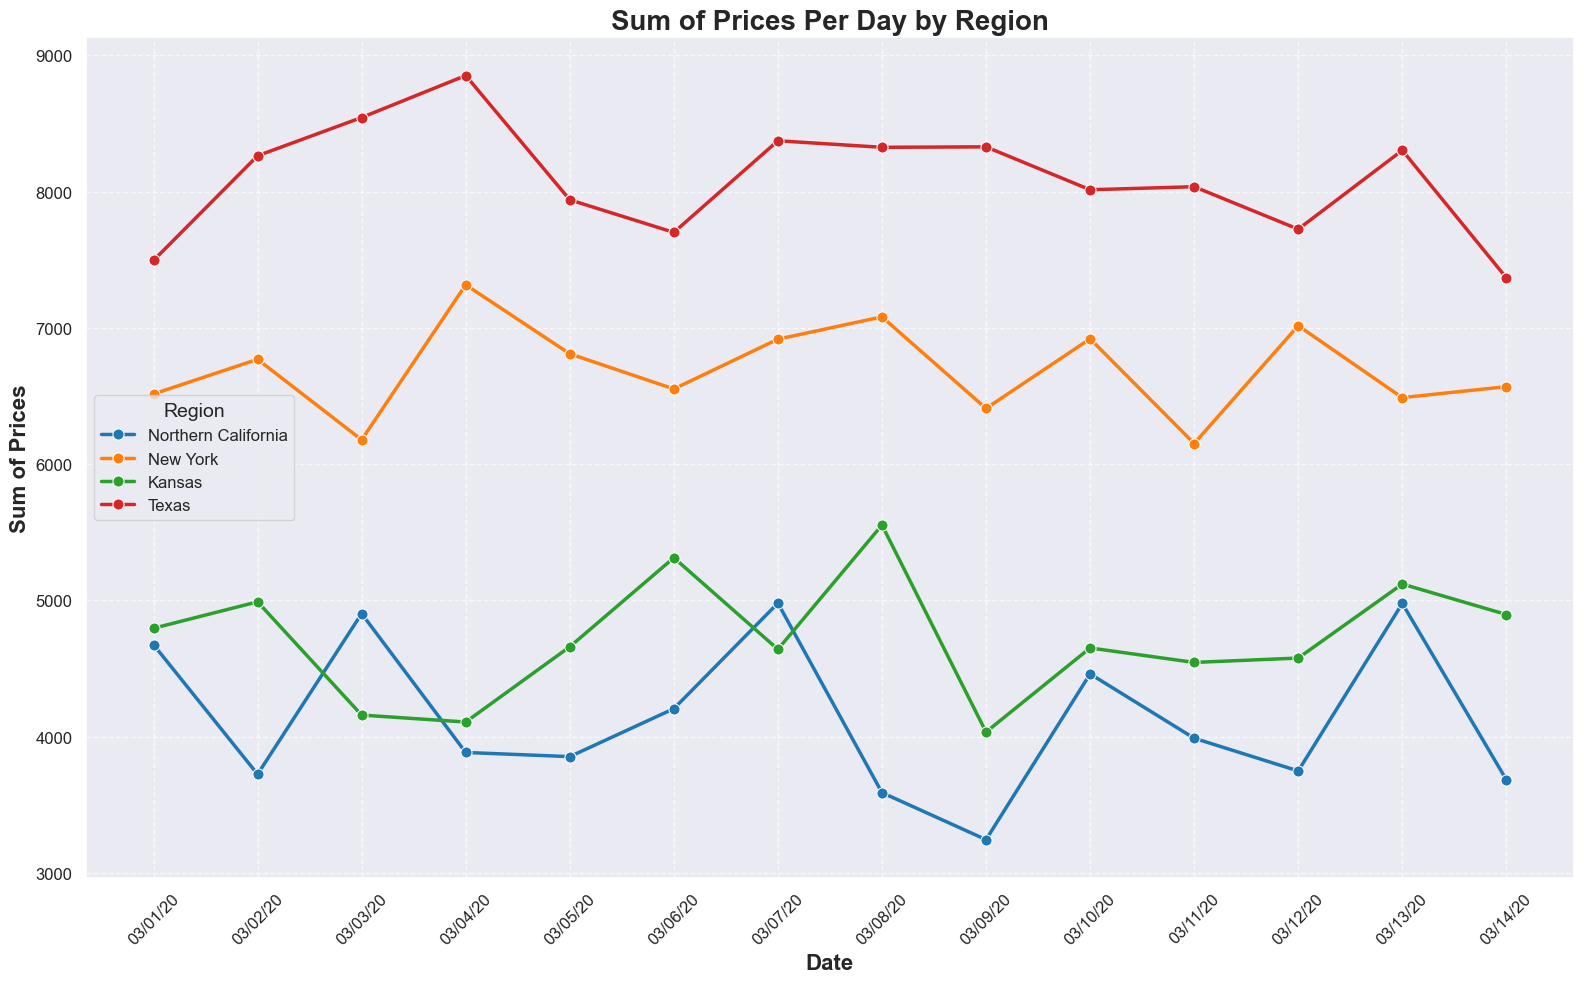

In [67]:
# Set the style and color palette for the plots
sns.set(style="darkgrid")
color_palette = sns.color_palette("tab10", len(final_df['Region'].unique()))

# Get unique regions
regions = final_df['Region'].unique()

plt.figure(figsize=(16, 10))

# Generate line plots for the sum of prices per day by region
for idx, region in enumerate(regions):
    region_data = final_df[final_df['Region'] == region]
    sum_price_per_day_region = region_data.groupby('Date')['Price'].sum().reset_index()
    
    sns.lineplot(
        data=sum_price_per_day_region,
        x='Date',
        y='Price',
        marker='o',
        label=region,
        color=color_palette[idx],
        linewidth=2.5,
        markersize=8
    )

plt.title('Sum of Prices Per Day by Region', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Sum of Prices', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Region', title_fontsize=14, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* The figure represents the sum of the price per day for four regions; Northern California, New York, Kansas and Texas.
Now, what the figure shows is that the region Texas always studied the highest price per day sums, then comes New York and Kansas, and lastly Northern California proved to be the one with the lowest price sums, which demonstrates that there are regions with different pricing trends and probably different demand from the buyers.
Interestingly, we can say that the biggest difference in the texas price was the most fluctuated one compared to the other regions, and we can argue that it can be a sign of volatilitiy or their prices are also highly affected by specific local events that happened in that area.

### Sum of Prices Per Day by Banner

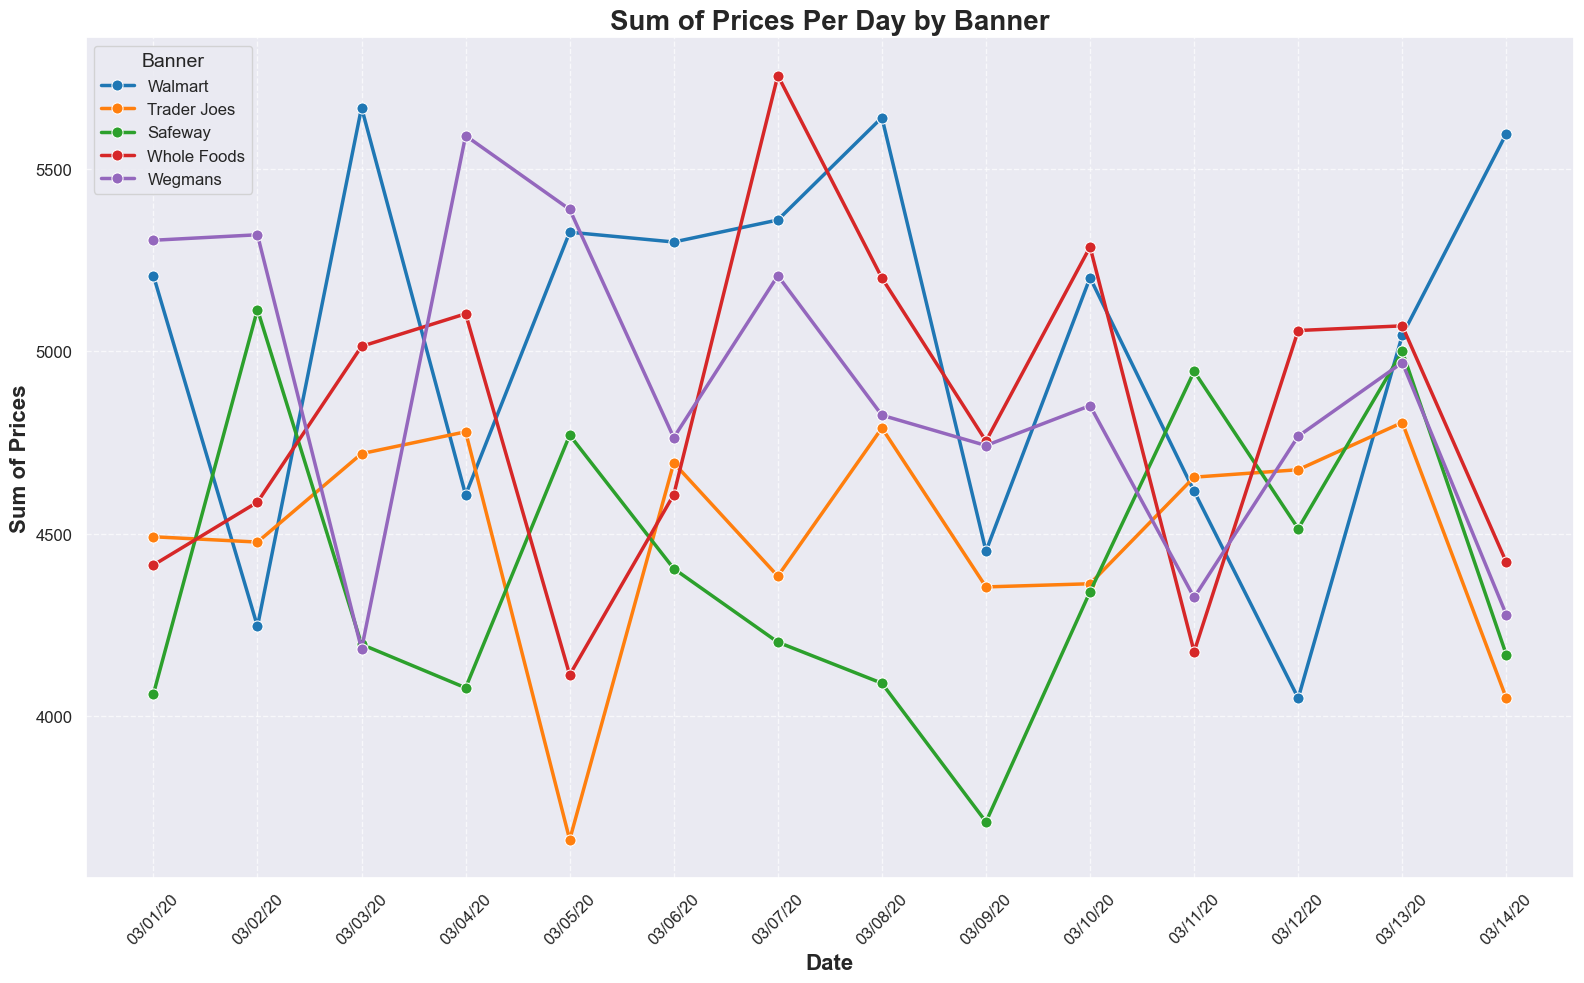

In [68]:
# Set the style and color palette for the plots
sns.set(style="darkgrid")
color_palette = sns.color_palette("tab10", len(final_df['Banner'].unique()))

# Get unique banners
banners = final_df['Banner'].unique()

plt.figure(figsize=(16, 10))

# Generate line plots for the sum of prices per day by banner
for idx, banner in enumerate(banners):
    banner_data = final_df[final_df['Banner'] == banner]
    sum_price_per_day_banner = banner_data.groupby('Date')['Price'].sum().reset_index()
    
    sns.lineplot(
        data=sum_price_per_day_banner,
        x='Date',
        y='Price',
        marker='o',
        label=banner,
        color=color_palette[idx],
        linewidth=2.5,
        markersize=8
    )

plt.title('Sum of Prices Per Day by Banner', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Sum of Prices', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Banner', title_fontsize=14, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* The plot demonstrates the sum of prices per day across different retail banners: Walmart, Trader Joes, Safeway, Whole Foods, and Wegmans. It indicates significant variability in daily price sums within each banner, with Wegmans showing the highest peaks on several occasions, suggesting higher price volatility or promotional activities. In contrast, Safeway and Trader Joes display relatively stable pricing trends, highlighting consistent pricing strategies within these banners.

### Sum of Prices Per Day by Store ID

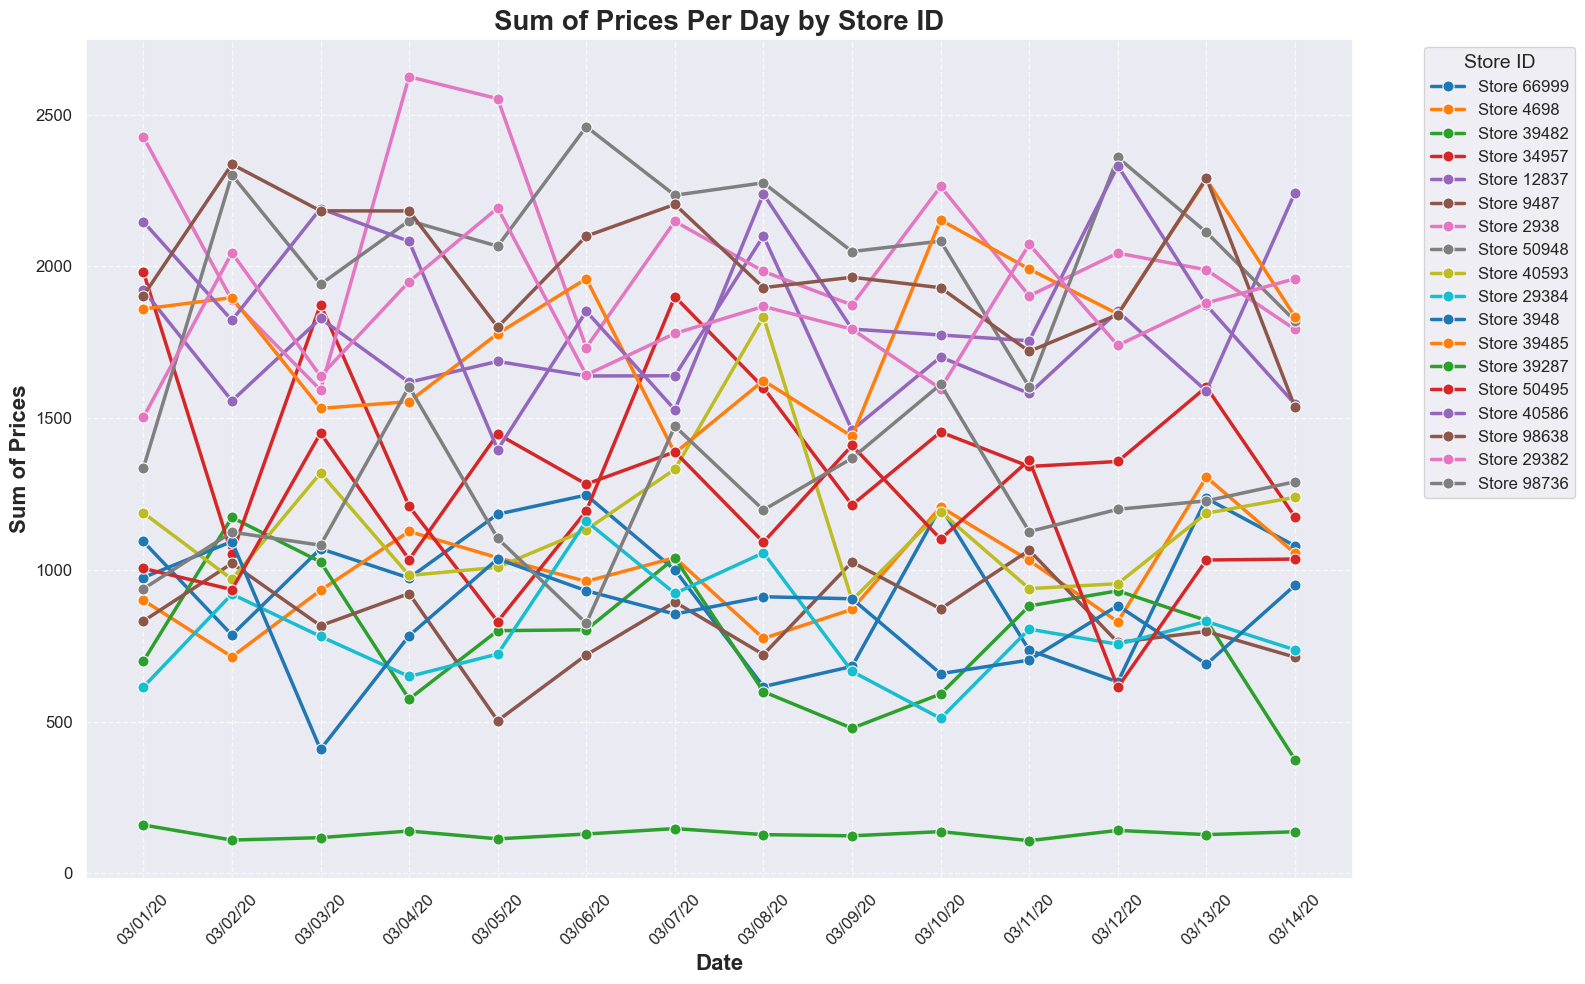

In [69]:
# Set the style and color palette for the plots
sns.set(style="darkgrid")
color_palette = sns.color_palette("tab10", len(final_df['Store ID'].unique()))

# Get unique store IDs
store_ids = final_df['Store ID'].unique()

plt.figure(figsize=(16, 10))

# Generate line plots for the sum of prices per day by store ID
for idx, store_id in enumerate(store_ids):
    store_data = final_df[final_df['Store ID'] == store_id]
    sum_price_per_day_store = store_data.groupby('Date')['Price'].sum().reset_index()
    
    sns.lineplot(
        data=sum_price_per_day_store,
        x='Date',
        y='Price',
        marker='o',
        label=f'Store {store_id}',
        color=color_palette[idx % len(color_palette)],  # Cycle through the color palette
        linewidth=2.5,
        markersize=8
    )

plt.title('Sum of Prices Per Day by Store ID', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Sum of Prices', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Store ID', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* It describes the sum of price amount per day from different store id levels. From the plot, it is shown considerable differences of the daily price amount among the stores. Some stores like store 98638 and store 39485 respectively reach to highest peaks and more fluctuate commonly, which might appear active price fluctuating or advertising events. Some stores have steady and lower price amount at every day like store 40568 and store 29382, which might have less certainty about the effectiveness of pricing strategies, or less sale amount.

### Defined the Anomaly case

In [99]:
# Price ratio compared to the base price
final_df['Price_Ratio'] = final_df['Price'] / final_df['Base_Price']-1

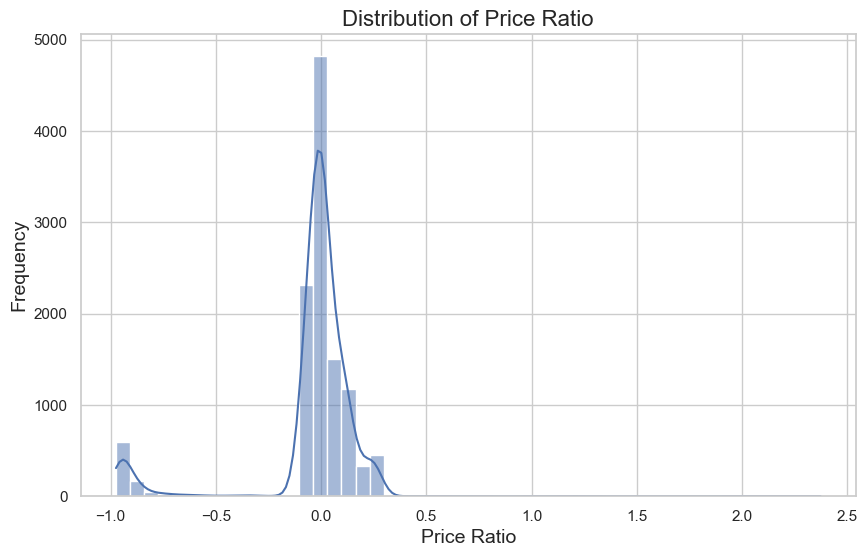

In [100]:
# Plot the distribution of Price_Ratio
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Price_Ratio'], bins=50, kde=True)
plt.title('Distribution of Price Ratio', fontsize=16)
plt.xlabel('Price Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

* The describe of price_ratio, we could find it out from the distribution that lots of price_ratio are arise in the area of base price, which means most of the prices is almost the same with their base prices, especially at the area of 0 which is the place far from these outliers in both the left and right side of zero.

In [101]:
# Define the threshold for Price_Ratio to determine outliers
threshold_lower = -0.2
threshold_upper = 0.2

# Update the is_outlier column based on the threshold
final_df['is_outlier'] = final_df['Price_Ratio'].apply(lambda x: 1 if x < threshold_lower or x > threshold_upper else 0)


In [102]:
final_df['is_outlier'].value_counts()

0    10065
1     1446
Name: is_outlier, dtype: int64

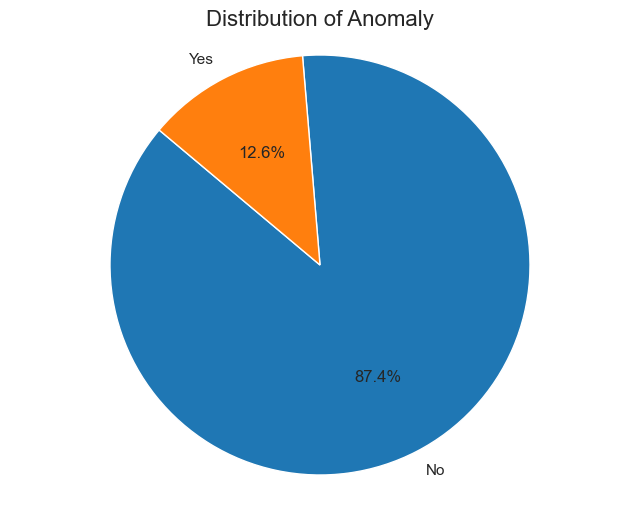

In [103]:
# Calculate the counts of outliers and non-outliers
outlier_counts = final_df['is_outlier'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outlier_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=140)
plt.title('Distribution of Anomaly', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Generate Pivot Table

* Question 2-1: Here we generaete a cross-tabulation of regional prices alongside each other, and then save it into a new pivot table.

In [104]:
# Generate a pivot table summarizing the average price per UPC and Banner across different regions
pivot_table = pd.pivot_table(
    final_df,
    values='Price',
    index=['Banner', 'UPC'],
    columns='Region',
    aggfunc=np.mean,
    fill_value=np.nan
)

# Display the pivot table
print(pivot_table)


Region                 Kansas  New York  Northern California  Texas
Banner      UPC                                                    
Safeway     11873171      NaN       NaN                 6.09   5.19
            15052612    53.99       NaN                  NaN  54.49
            16482322    17.89       NaN                  NaN  18.09
            16729338     7.99       NaN                 9.39   8.09
            16829288     3.59       NaN                 4.19   3.59
...                       ...       ...                  ...    ...
Whole Foods 995798889    1.99     62.39                70.39  60.59
            996262978    1.99     14.39                16.19  13.89
            996849471    1.99     12.79                  NaN    NaN
            998831540    1.99     39.99                  NaN  38.79
            999185078    1.99     58.09                65.49    NaN

[4931 rows x 4 columns]


### Missing values and save pivot table

In [105]:
# Calculate the median price for each UPC
median_prices = final_df.groupby('UPC')['Price'].median()

# Function to replace NaN with median price
def fill_missing_with_median(row, medians):
    return row.fillna(medians[row.name[1]])

# Apply the function to the pivot table
pivot_table_filled = pivot_table.apply(lambda row: fill_missing_with_median(row, median_prices), axis=1)

# Display the filled pivot table
print(pivot_table_filled)

# Save the pivot table to a CSV file
pivot_table_filled.to_csv('pivot_table_avg_price_per_upc_per_region_filled.csv')


Region                 Kansas  New York  Northern California  Texas
Banner      UPC                                                    
Safeway     11873171     5.19      5.19                 6.09   5.19
            15052612    53.99     54.49                54.49  54.49
            16482322    17.89     17.64                17.64  18.09
            16729338     7.99      8.04                 9.39   8.09
            16829288     3.59      3.39                 4.19   3.59
...                       ...       ...                  ...    ...
Whole Foods 995798889    1.99     62.39                70.39  60.59
            996262978    1.99     14.39                16.19  13.89
            996849471    1.99     12.79                11.39  11.39
            998831540    1.99     39.99                36.29  38.79
            999185078    1.99     58.09                65.49  52.49

[4931 rows x 4 columns]


In [106]:
final_df

,Auditor ID,Date,Price,Store ID,UPC,Banner,Region,Auditor Name,Base_Price,log_price,Price_Ratio,is_outlier,Aj,Bk,New_Price
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue Smith,23.59,3.216874,0.057652,0,1.045301,1.110409,27.381182
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue Smith,46.29,3.906206,0.073882,0,1.045301,1.110409,53.729331
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue Smith,24.29,3.248435,0.060107,0,1.045301,1.110409,28.193680
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue Smith,17.69,2.934389,0.063313,0,1.045301,1.110409,20.532985
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue Smith,31.79,3.506158,0.048128,0,1.045301,1.110409,36.899016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,304,03/14/20,42.09,98736,700660531,Whole Foods,Texas,Jerry Johnson,39.29,3.739810,0.071265,0,0.956918,1.015548,38.181840
11507,304,03/07/20,20.29,98736,927693101,Whole Foods,Texas,Jerry Johnson,19.19,3.010128,0.057322,0,0.956918,1.015548,18.648753
11508,304,03/09/20,4.09,98736,47174618,Whole Foods,Texas,Jerry Johnson,3.69,1.408545,0.108401,0,0.956918,1.015548,3.585925
11509,304,03/03/20,35.59,98736,182310151,Whole Foods,Texas,Jerry Johnson,33.59,3.572065,0.059542,0,0.956918,1.015548,32.642607


# Base Price modeling

## Generate regression models

In [107]:
# Create dummy variables for banners and regions
dummy_banners = pd.get_dummies(final_df['Banner'], prefix='Banner')
dummy_regions = pd.get_dummies(final_df['Region'], prefix='Region')

# Concatenate dummy variables with the original dataframe
data_with_dummies = pd.concat([final_df, dummy_banners, dummy_regions], axis=1)

# Drop original categorical columns and other non-numerical columns if they exist
columns_to_drop = ['Banner', 'Region', 'Date', 'UPC', 'Auditor Name']
columns_to_drop = [col for col in columns_to_drop if col in data_with_dummies.columns]
data_with_dummies = data_with_dummies.drop(columns=columns_to_drop)

# Define the independent variables (X) and the dependent variable (y)
X = data_with_dummies.drop(columns=['Price', 'log_price'])
y = data_with_dummies['log_price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_


In [108]:
data_with_dummies

,Auditor ID,Price,Store ID,Base_Price,log_price,Price_Ratio,is_outlier,Aj,Bk,New_Price,Banner_Safeway,Banner_Trader Joes,Banner_Walmart,Banner_Wegmans,Banner_Whole Foods,Region_Kansas,Region_New York,Region_Northern California,Region_Texas
0,234,24.95,66999,23.59,3.216874,0.057652,0,1.045301,1.110409,27.381182,0,0,1,0,0,0,0,1,0
1,234,49.71,66999,46.29,3.906206,0.073882,0,1.045301,1.110409,53.729331,0,0,1,0,0,0,0,1,0
2,234,25.75,66999,24.29,3.248435,0.060107,0,1.045301,1.110409,28.193680,0,0,1,0,0,0,0,1,0
3,234,18.81,66999,17.69,2.934389,0.063313,0,1.045301,1.110409,20.532985,0,0,1,0,0,0,0,1,0
4,234,33.32,66999,31.79,3.506158,0.048128,0,1.045301,1.110409,36.899016,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,304,42.09,98736,39.29,3.739810,0.071265,0,0.956918,1.015548,38.181840,0,0,0,0,1,0,0,0,1
11507,304,20.29,98736,19.19,3.010128,0.057322,0,0.956918,1.015548,18.648753,0,0,0,0,1,0,0,0,1
11508,304,4.09,98736,3.69,1.408545,0.108401,0,0.956918,1.015548,3.585925,0,0,0,0,1,0,0,0,1
11509,304,35.59,98736,33.59,3.572065,0.059542,0,0.956918,1.015548,32.642607,0,0,0,0,1,0,0,0,1


## Generate multiplicative factor A_j and B_k

In [109]:
# Get banner and region multipliers
banner_columns = [col for col in X.columns if col.startswith('Banner')]
region_columns = [col for col in X.columns if col.startswith('Region')]

# Create a DataFrame for banner and region multipliers
banner_multipliers = pd.DataFrame({
    'Banner': banner_columns,
    'log_Aj': coefficients[:len(banner_columns)]
})
region_multipliers = pd.DataFrame({
    'Region': region_columns,
    'log_Bk': coefficients[len(banner_columns):len(banner_columns) + len(region_columns)]
})

# Convert log multipliers to actual multipliers
banner_multipliers['Aj'] = np.exp(banner_multipliers['log_Aj'])
region_multipliers['Bk'] = np.exp(region_multipliers['log_Bk'])

# Map multipliers back to the original dataframe
# Extract the column names correctly
banner_multipliers['Banner'] = banner_multipliers['Banner'].str.replace('Banner_', '')
region_multipliers['Region'] = region_multipliers['Region'].str.replace('Region_', '')

# Create dictionaries for mapping
banner_dict = banner_multipliers.set_index('Banner')['Aj'].to_dict()
region_dict = region_multipliers.set_index('Region')['Bk'].to_dict()

# Map the multipliers back to the original dataframe
final_df['Aj'] = final_df['Banner'].map(banner_dict)
final_df['Bk'] = final_df['Region'].map(region_dict)

# Create a DataFrame for all combinations of banners and regions
all_combinations = pd.MultiIndex.from_product([banner_dict.keys(), region_dict.keys()], names=['Banner', 'Region']).to_frame(index=False)

# Map the multipliers to the combinations
all_combinations['Aj'] = all_combinations['Banner'].map(banner_dict)
all_combinations['Bk'] = all_combinations['Region'].map(region_dict)

# Display the table
all_combinations


,Banner,Region,Aj,Bk
0,Safeway,Kansas,1.000184,0.995778
1,Safeway,New York,1.000184,0.998369
2,Safeway,Northern California,1.000184,1.000242
3,Safeway,Texas,1.000184,0.969919
4,Trader Joes,Kansas,1.000000,0.995778
5,Trader Joes,New York,1.000000,0.998369
6,Trader Joes,Northern California,1.000000,1.000242
7,Trader Joes,Texas,1.000000,0.969919
8,Walmart,Kansas,1.044415,0.995778
9,Walmart,New York,1.044415,0.998369


## Bar Charts for Banner and Region Multipliers


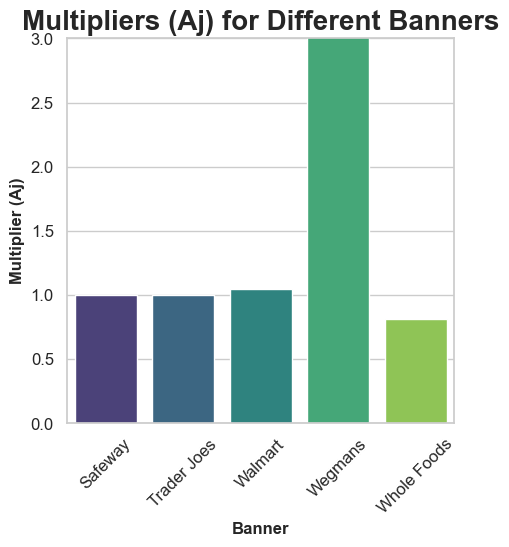

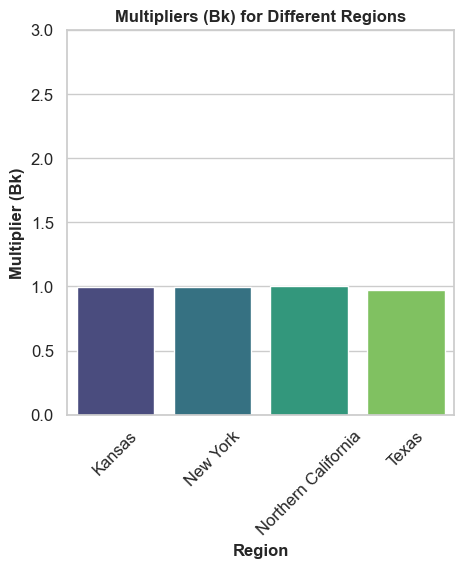

In [110]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar chart for Banner Multipliers (Aj)
plt.figure(figsize=(5,5))
sns.barplot(data=banner_multipliers, x='Banner', y='Aj', palette='viridis')
plt.title('Multipliers (Aj) for Different Banners', fontsize=20, fontweight='bold')
plt.xlabel('Banner', fontsize=12, fontweight='bold')
plt.ylabel('Multiplier (Aj)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0,3))
plt.show()

# Bar chart for Region Multipliers (Bk)
plt.figure(figsize=(5,5))
sns.barplot(data=region_multipliers, x='Region', y='Bk', palette='viridis')
plt.title('Multipliers (Bk) for Different Regions', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Multiplier (Bk)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0,3))
plt.show()


* The bar chart for Aj multipliers shows that Whole Foods has the highest multiplier, indicating a greater price adjustment compared to other banners, while Wegmans has the lowest. In terms of Bk multipliers, Kansas exhibits the highest regional adjustment, significantly above other regions, which have similar and lower multipliers.

## Calculate the Base Price

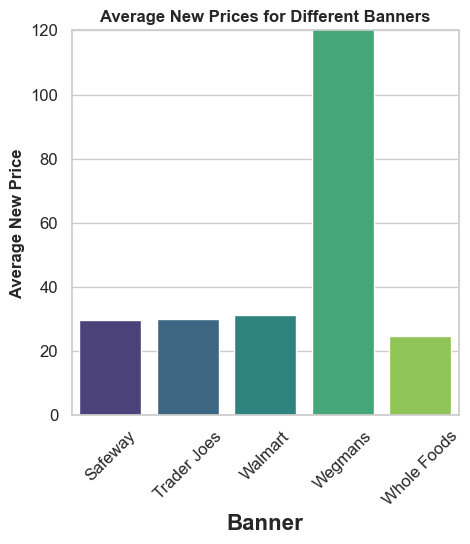

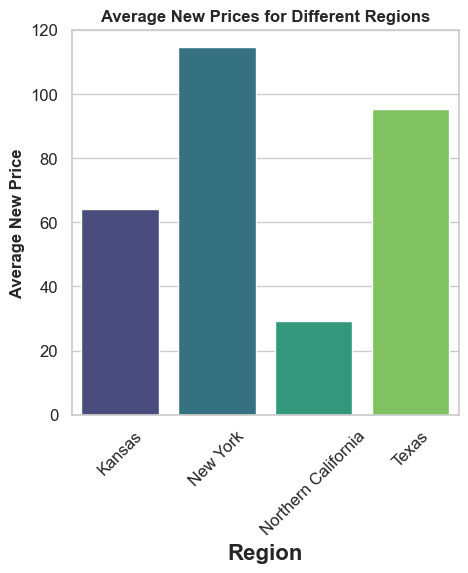

In [111]:
# Calculate the new prices using the equation Pi,j,k = Pi × Aj × Bk
final_df['New_Price'] = final_df['Base_Price'] * final_df['Aj'] * final_df['Bk']

# Calculate the average new price for each banner
avg_new_price_per_banner = final_df.groupby('Banner')['New_Price'].mean().reset_index()

# Set the style for the plots
sns.set(style="whitegrid")

# Bar chart for Average New Prices by Banner
plt.figure(figsize=(5, 5))
sns.barplot(data=avg_new_price_per_banner, x='Banner', y='New_Price', palette='viridis')
plt.title('Average New Prices for Different Banners', fontsize=12, fontweight='bold')
plt.xlabel('Banner', fontsize=16, fontweight='bold')
plt.ylabel('Average New Price', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0,120))
plt.show()

# Calculate the average new price for each region
avg_new_price_per_region = final_df.groupby('Region')['New_Price'].mean().reset_index()

# Bar chart for Average New Prices by Region
plt.figure(figsize=(5, 5))
sns.barplot(data=avg_new_price_per_region, x='Region', y='New_Price', palette='viridis')
plt.title('Average New Prices for Different Regions', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=16, fontweight='bold')
plt.ylabel('Average New Price', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0,120))
plt.show()



* The bar chart for average new prices by banner shows that Whole Foods has the highest average new price, while Wegmans has the lowest. The regional chart reveals that Kansas has the highest average new price compared to other regions, with New York having the lowest average new price.

In [112]:
final_df

,Auditor ID,Date,Price,Store ID,UPC,Banner,Region,Auditor Name,Base_Price,log_price,Price_Ratio,is_outlier,Aj,Bk,New_Price
0,234,03/03/20,24.95,66999,268588472,Walmart,Northern California,Sue Smith,23.59,3.216874,0.057652,0,1.044415,1.000242,24.643725
1,234,03/12/20,49.71,66999,475245085,Walmart,Northern California,Sue Smith,46.29,3.906206,0.073882,0,1.044415,1.000242,48.357696
2,234,03/05/20,25.75,66999,126967843,Walmart,Northern California,Sue Smith,24.29,3.248435,0.060107,0,1.044415,1.000242,25.374993
3,234,03/08/20,18.81,66999,708930835,Walmart,Northern California,Sue Smith,17.69,2.934389,0.063313,0,1.044415,1.000242,18.480182
4,234,03/08/20,33.32,66999,325885139,Walmart,Northern California,Sue Smith,31.79,3.506158,0.048128,0,1.044415,1.000242,33.210005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,304,03/14/20,42.09,98736,700660531,Whole Foods,Texas,Jerry Johnson,39.29,3.739810,0.071265,0,0.816125,0.969919,31.100992
11507,304,03/07/20,20.29,98736,927693101,Whole Foods,Texas,Jerry Johnson,19.19,3.010128,0.057322,0,0.816125,0.969919,15.190329
11508,304,03/09/20,4.09,98736,47174618,Whole Foods,Texas,Jerry Johnson,3.69,1.408545,0.108401,0,0.816125,0.969919,2.920913
11509,304,03/03/20,35.59,98736,182310151,Whole Foods,Texas,Jerry Johnson,33.59,3.572065,0.059542,0,0.816125,0.969919,26.589013


# ML Modeling

## Training and Test data

In [113]:
# Define the feature set X
features = [col for col in data_with_dummies.columns if col.startswith('Banner_')] + \
           [col for col in data_with_dummies.columns if col.startswith('Region_')]

X = data_with_dummies[features]

# Define the target variable y
y = final_df['is_outlier']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## ML Model (LR, DT, RF, GB)

In [114]:

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, random_state=42)
}

# Train the models and plot ROC-AUC curves
plt.figure(figsize=(10, 8))
model_performance = []

<Figure size 1000x800 with 0 Axes>

In [115]:
X_train

,Banner_Safeway,Banner_Trader Joes,Banner_Walmart,Banner_Wegmans,Banner_Whole Foods,Region_Kansas,Region_New York,Region_Northern California,Region_Texas
6586,1,0,0,0,0,1,0,0,0
10614,1,0,0,0,0,0,0,0,1
2213,0,0,1,0,0,0,1,0,0
833,1,0,0,0,0,0,0,1,0
8404,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,1,0,0,0,1
5191,0,0,1,0,0,1,0,0,0
5390,0,1,0,0,0,1,0,0,0
860,1,0,0,0,0,0,0,1,0


## Plot the ROC-AUC Curve and Confusion Matrix

C:\Users\hardw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


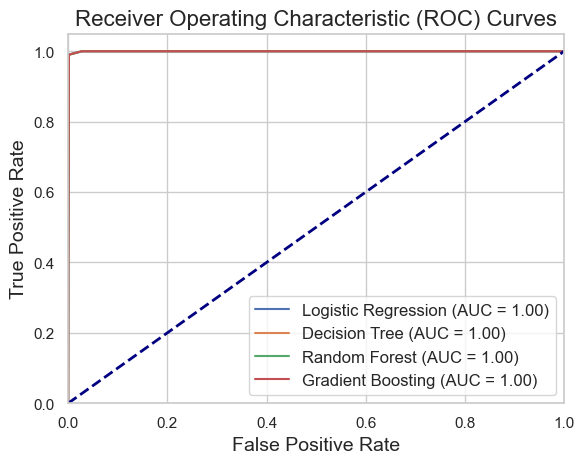

In [116]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=plt.gca())
    y_pred = model.predict(X_test)
    model_performance.append({
        'Model': name,
        'AUC': roc_auc,
        'Accuracy': model.score(X_test, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

* The ROC curves for all four models (Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting) indicate perfect classification performance with an AUC of 1.00, suggesting potential data leakage or overfitting. This indicates that the models have likely learned the training data too well, capturing even the noise, resulting in unrealistic performance on the test data.

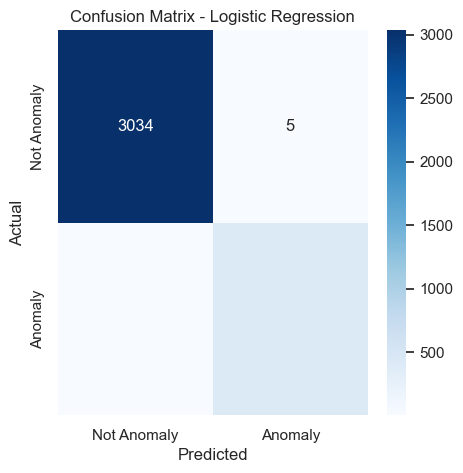

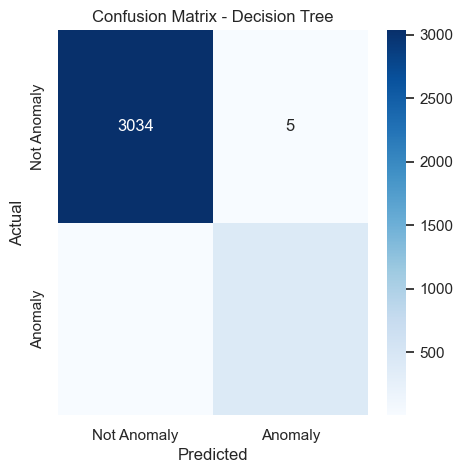

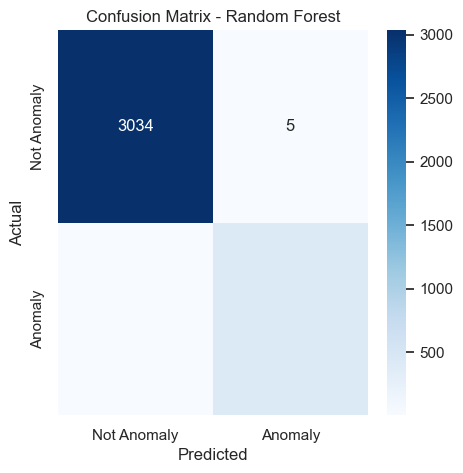

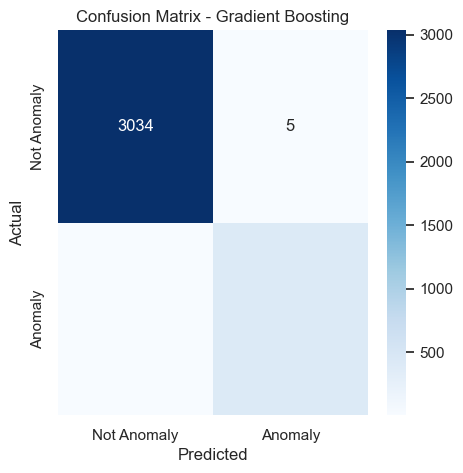

In [117]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Anomaly', 'Anomaly'], yticklabels=['Not Anomaly', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

## Feature Importance

                 Model       AUC  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.999209  0.997394   0.987981  0.990361   0.98917
1        Decision Tree  0.999209  0.997394   0.987981  0.990361   0.98917
2        Random Forest  0.999209  0.997394   0.987981  0.990361   0.98917
3    Gradient Boosting  0.999209  0.997394   0.987981  0.990361   0.98917


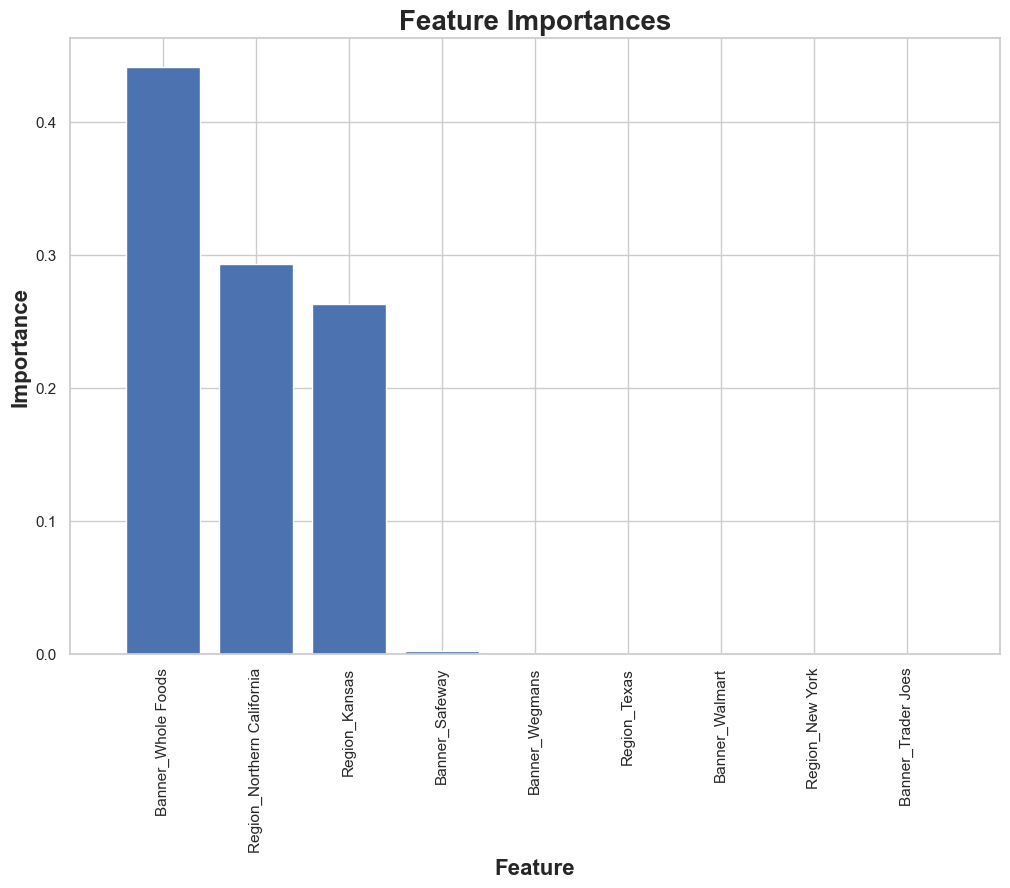

In [118]:
# Create a DataFrame to summarize the performance of each model
performance_df = pd.DataFrame(model_performance)

# Display the performance table
print(performance_df)

# Choose the best model based on AUC and plot the feature importance
best_model_name = performance_df.loc[performance_df['AUC'].idxmax(), 'Model']
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Feature importance for the best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances', fontsize=20, fontweight='bold')
    plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
    plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.xlabel('Feature', fontsize=16, fontweight='bold')
    plt.ylabel('Importance', fontsize=16, fontweight='bold')
    plt.show()
else:
    print(f"The model {best_model_name} does not support feature importances.")

* The feature importance plot shows that Banner_Whole Foods, Region_Northern California, and Region_Kansas are the most significant factors in determining outliers in the model, with Banner_Whole Foods having the highest importance. Other features like different regions and banners have minimal importance, indicating their lesser impact on the model's predictions.

## Deal with Imbalance data (SMOTE)

In [119]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the models with class weights
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight_dict),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train the models and plot ROC-AUC curves
plt.figure(figsize=(10, 8))
model_performance = []

<Figure size 1000x800 with 0 Axes>

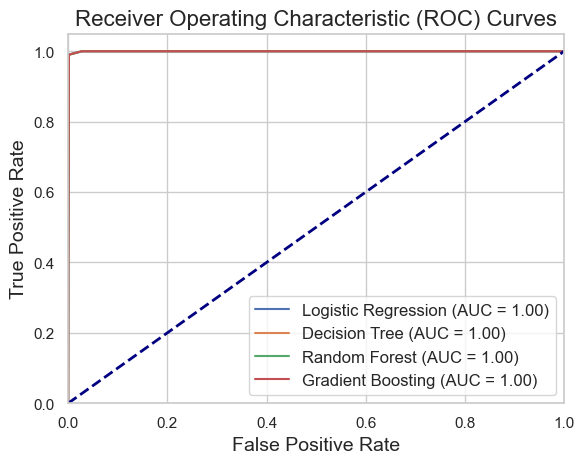

In [120]:
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=plt.gca())
    y_pred = model.predict(X_test)
    model_performance.append({
        'Model': name,
        'AUC': roc_auc,
        'Accuracy': model.score(X_test, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


                 Model       AUC  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.999209  0.975391   0.830000  1.000000  0.907104
1        Decision Tree  0.999209  0.997394   0.987981  0.990361  0.989170
2        Random Forest  0.999209  0.997394   0.987981  0.990361  0.989170
3    Gradient Boosting  0.999209  0.997394   0.987981  0.990361  0.989170


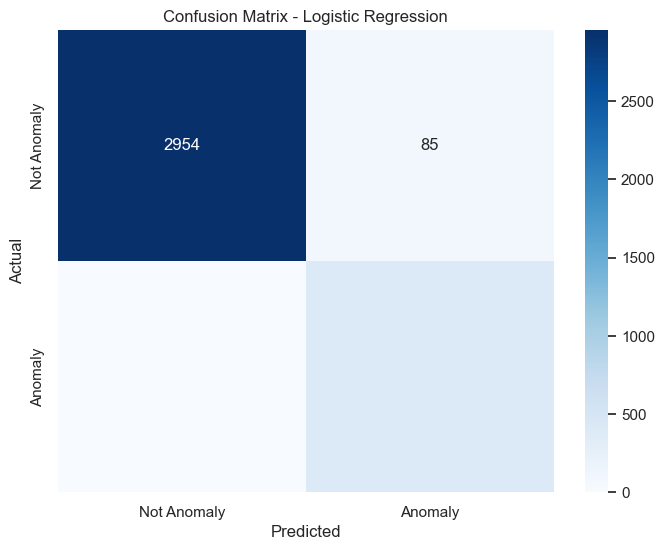

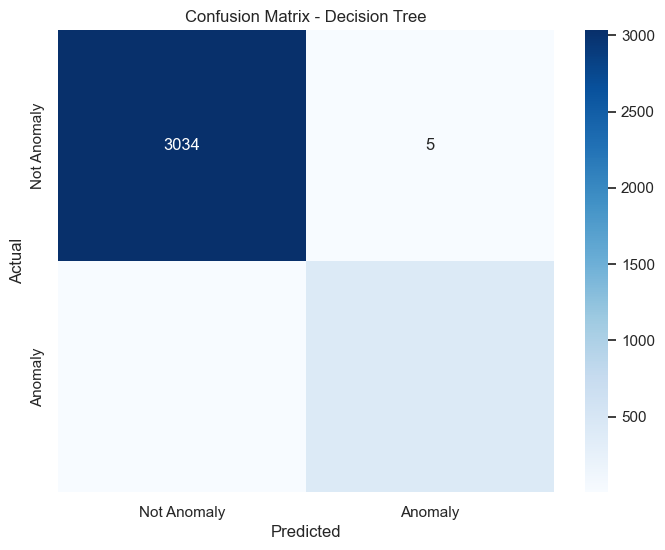

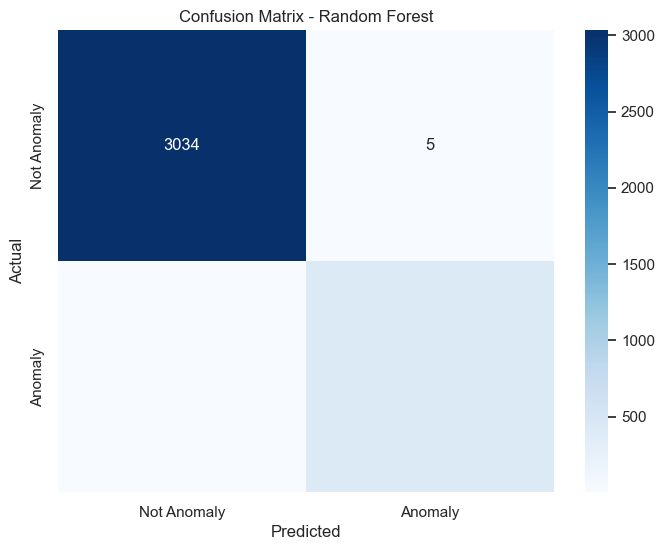

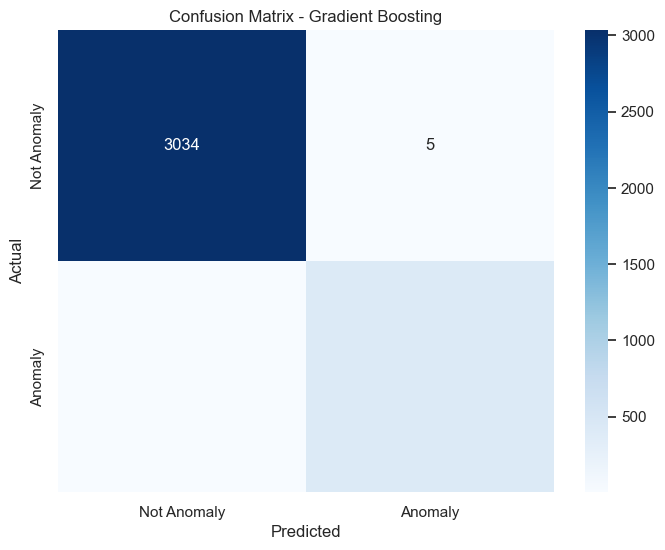

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [121]:
# Create a DataFrame to summarize the performance of each model
performance_df = pd.DataFrame(model_performance)

# Display the performance table
print(performance_df)

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Anomaly', 'Anomaly'], yticklabels=['Not Anomaly', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Choose the best model based on AUC and plot the feature importance
best_model_name = performance_df.loc[performance_df['AUC'].idxmax(), 'Model']
best_model = models[best_model_name]
best_model.fit(X_train_res, y_train_res)

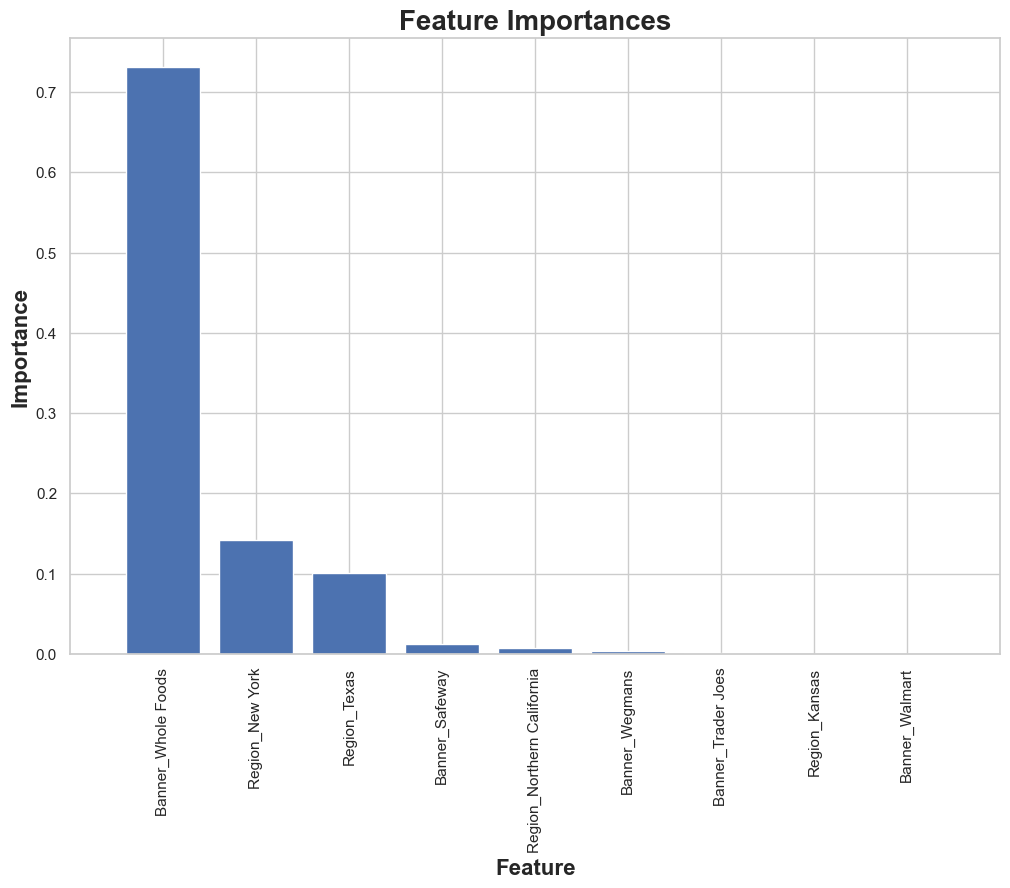

In [122]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances', fontsize=20, fontweight='bold')
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature', fontsize=16, fontweight='bold')
plt.ylabel('Importance', fontsize=16, fontweight='bold')
plt.show()

* The feature importance plot indicates that Banner_Whole Foods is the most significant factor in determining outliers, with a considerably higher importance than any other feature. Other features, such as Region_New York and Region_Texas, also contribute but to a much lesser extent, while the remaining features have minimal impact on the model's predictions.